In [29]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.pretty_print import pretty_cpt

from IPython.display import display, Math, Latex

# Exercice 2

On lance 2 dés (équilibrés). Déterminer, grâce à un réseau bayésien la loi de probabilité du maximum des chiffres indiqués par les 2 dés.

PS- on peut représenter des dépendances fonctionnelles entre variables par des CPTs ne contenant que des probabilités $0$ ou $1$

In [30]:
# definition des noeuds
de1 = gum.RangeVariable("d1","",1,6)
de2 = gum.RangeVariable("d2","",1,6)
maxi = gum.RangeVariable("m","maximum",1,6)

table de probabilités du max
         |-------------------------------------------|
---------|                     m                     |
 d1 | d2 |   1      2      3      4      5      6    |
---------|-------------------------------------------|
 1  | 1  | 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 |
 2  | 1  | 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 |
 3  | 1  | 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 |
 4  | 1  | 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 |
 5  | 1  | 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 |
 6  | 1  | 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 |
 1  | 2  | 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 |
 2  | 2  | 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 |
 3  | 2  | 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 |
 4  | 2  | 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 |
 5  | 2  | 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 |
 6  | 2  | 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 |
 1  | 3  | 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 |
 2  | 3  | 0.0000 0.0000 1.0000 0.00

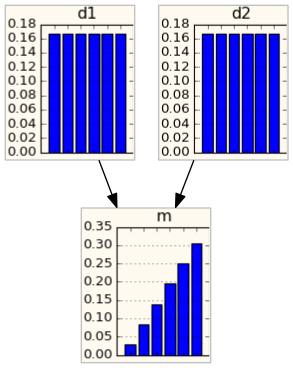

inferences sachant m=4


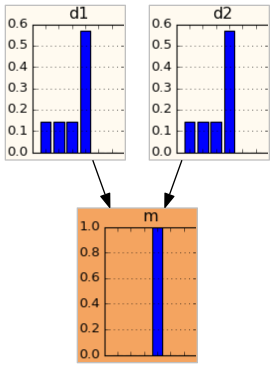

inferences sachant d1=2 et m=4


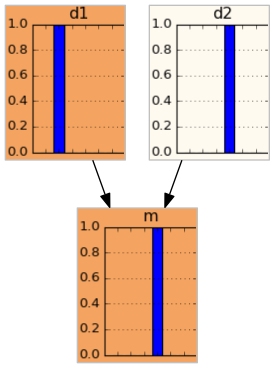

inferences sachant d1=2 et m>3


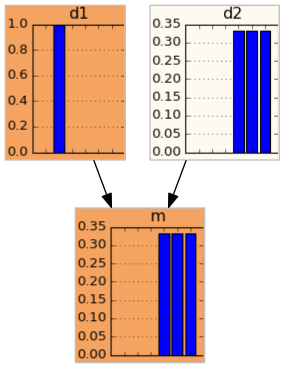

In [37]:
# définition du réseau
bn = gum.BayesNet()
# definition des variables des deux dés
d1 = bn.add(de1)
d2 = bn.add(de2)
# utilisation d'aggregateur pour le max
m = bn.addMAX(maxi) # grace à addMAX, pas besoin de definir la cpt pour m
# definition des arcs
bn.addArc(d1,m)
bn.addArc(d2,m)
# definition ds probas a priori
bn.cpt(d1).fillWith([1]*6).normalize()
bn.cpt(d2).fillWith([1]*6).normalize()

import pyAgrum.lib.notebook as nb
nb.showBN(bn)

print("table de probabilités du max")
print(pretty_cpt(bn.cpt(m)))

print("inferences")
gnb.showInference(bn)

print("inferences sachant m=4")
gnb.showInference(bn,evs={"m":4})

print("inferences sachant d1=2 et m=4")
gnb.showInference(bn,evs={"d1":2,"m":4})

print("inferences sachant d1=2 et m>3")
gnb.showInference(bn,evs={"d1":2,"m":[0,0,0,1,1,1]}) # on traduit m>3 par